In [16]:
import pandas as pd

In [17]:
dataset = pd.read_csv("/home/tintin/Study/Data-Science/Statistical-Machine-Learning/Learn-PCA/Datasets/Wine.csv")
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [18]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:, -1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train_sc = SC.fit_transform(X_train)
X_test_sc = SC.transform(X_test)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_sc_pca = pca.fit_transform(X_train_sc)
X_test_sc_pca = pca.transform(X_test_sc)

In [22]:
information_gain_ratio = pca.explained_variance_ratio_
print(information_gain_ratio)

[0.36884109 0.19318394]


In [23]:
print(sum(information_gain_ratio))

0.562025035922731


In [24]:
eigen_values = pca.singular_values_
print(eigen_values)

eigen_vectors = pca.components_
print(eigen_vectors.shape)

print(eigen_vectors)

[26.09369    18.88432045]
(2, 13)
[[ 0.12959991 -0.24464064 -0.01018912 -0.24051579  0.12649451  0.38944115
   0.42757808 -0.30505669  0.30775255 -0.11027186  0.30710508  0.37636185
   0.2811085 ]
 [-0.49807323 -0.23168482 -0.31496874  0.02321825 -0.25841951 -0.1006849
  -0.02097952 -0.0399057  -0.06746036 -0.53087111  0.27161729  0.16071181
  -0.36547344]]


In [25]:
print(X_train[:3])
print(X_train_sc_pca[:3])

[[1.369e+01 3.260e+00 2.540e+00 2.000e+01 1.070e+02 1.830e+00 5.600e-01
  5.000e-01 8.000e-01 5.880e+00 9.600e-01 1.820e+00 6.800e+02]
 [1.269e+01 1.530e+00 2.260e+00 2.070e+01 8.000e+01 1.380e+00 1.460e+00
  5.800e-01 1.620e+00 3.050e+00 9.600e-01 2.060e+00 4.950e+02]
 [1.162e+01 1.990e+00 2.280e+00 1.800e+01 9.800e+01 3.020e+00 2.260e+00
  1.700e-01 1.350e+00 3.250e+00 1.160e+00 2.960e+00 3.450e+02]]
[[-2.17884511 -1.07218467]
 [-1.80819239  1.57822344]
 [ 1.09829474  2.22124345]]


In [26]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [27]:
def VisualizingDataset(X_, Y_):
    X1 = X_[:, 0]
    X2 = X_[:, 1]
    for i, label in enumerate(np.unique(Y_)):
        plt.scatter(X1[Y_ == label], X2[Y_ == label],
        color = ListedColormap(("red", "green", "blue"))(i),
        label = label)
    plt.legend()

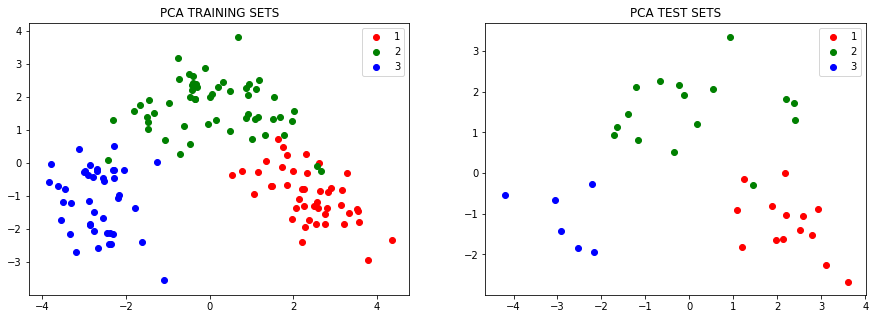

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("PCA TRAINING SETS")
VisualizingDataset(X_train_sc_pca, Y_train)
plt.subplot(1,2,2)
plt.title("PCA TEST SETS")
VisualizingDataset(X_test_sc_pca, Y_test)
plt.show()

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state= 0)
log_reg.fit(X_train, Y_train)

/home/tintin/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
pca_log_reg = LogisticRegression(random_state = 0)
pca_log_reg.fit(X_train_sc_pca, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

[[44  1  0]
 [ 0 54  1]
 [ 0  0 42]]


Text(0.5, 1.0, 'Confusion Matrix using PCA of Test Set')

<Figure size 1080x360 with 0 Axes>

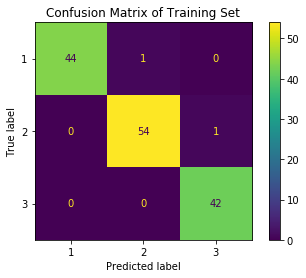

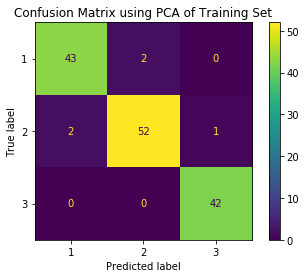

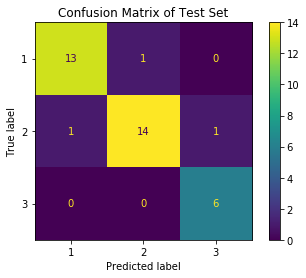

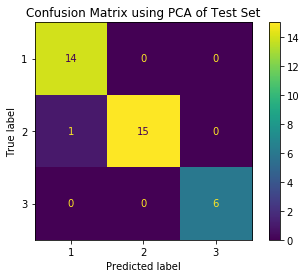

In [31]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(Y_train, log_reg.predict(X_train))
print(cm)
plt.figure(figsize=(15,5))

plot_confusion_matrix(log_reg, X_train, Y_train)
plt.title('Confusion Matrix of Training Set')

plot_confusion_matrix(pca_log_reg, X_train_sc_pca, Y_train)
plt.title('Confusion Matrix using PCA of Training Set')

plot_confusion_matrix(log_reg, X_test, Y_test)
plt.title('Confusion Matrix of Test Set')


plot_confusion_matrix(pca_log_reg, X_test_sc_pca, Y_test)
plt.title('Confusion Matrix using PCA of Test Set')

In [32]:
def VisualizingResult(model, X_):
    X1 = X_[:, 0]
    X2 = X_[:, 1]
    X1_range = np.arange(start= X1.min()-1, stop= X1.max()+1, step = 0.01)
    X2_range = np.arange(start= X2.min()-1, stop= X2.max()+1, step = 0.01)
    X1_matrix, X2_matrix = np.meshgrid(X1_range, X2_range)
    X_grid= np.array([X1_matrix.ravel(),X2_matrix.ravel()]).T
    Y_grid= model.predict(X_grid).reshape(X1_matrix.shape)
    plt.contourf(X1_matrix, X2_matrix, Y_grid, alpha = 0.5, cmap = ListedColormap(("red", "green", "blue")))

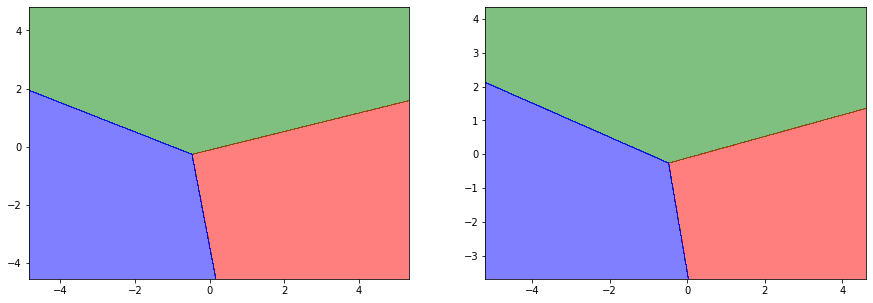

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
VisualizingResult(pca_log_reg, X_train_sc_pca)

plt.subplot(1,2,2)
VisualizingResult(pca_log_reg, X_test_sc_pca)
plt.show()

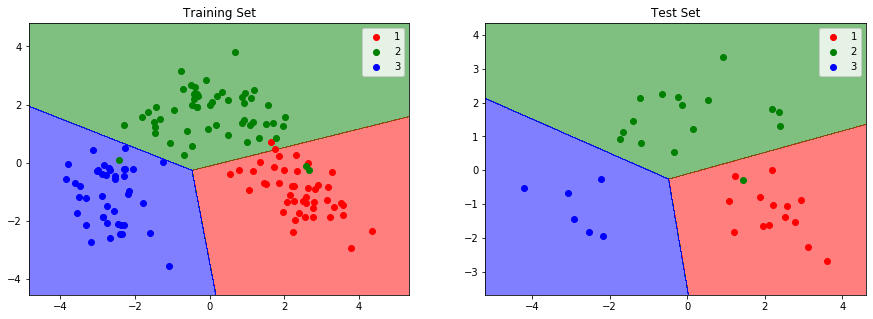

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Training Set")
VisualizingResult(pca_log_reg, X_train_sc_pca)
VisualizingDataset(X_train_sc_pca, Y_train)
plt.subplot(1,2,2)
plt.title("Test Set")
VisualizingResult(pca_log_reg, X_test_sc_pca)
VisualizingDataset(X_test_sc_pca, Y_test)
plt.show()

In [35]:
cm = confusion_matrix(Y_test, log_reg.predict(X_test))
print(cm)

cm = confusion_matrix(Y_test, pca_log_reg.predict(X_test_sc_pca))
print(cm)


[[13  1  0]
 [ 1 14  1]
 [ 0  0  6]]
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
